#Estatísitica básica com Pandas

#importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp

In [2]:
print(f'Versão do Pandas -> {pd.__version__}')
print(f'Versão do Numpy -> {np.__version__}')
print(f'Versão do seaborn -> {sns.__version__}')
print(f'Versão do scipy -> {sp.__version__}')

Versão do Pandas -> 1.1.5
Versão do Numpy -> 1.19.5
Versão do seaborn -> 0.11.1
Versão do scipy -> 1.4.1


Versão que foi utilizada pelo professor
Versão do Pandas -> 0.22.0
Versão do Numpy -> 1.14.6
Versão do seaborn -> 0.7.1
Versão do scipy -> 1.1.0
se precisar retornar para as versões antigas:
ex: !pip install pandas == '0.22.0'

In [3]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


Dado qualitativo e quantitativo.
Uf, Sexo, cor -> qualitativo.
Idade, Anos de estudo, renda e altura -> Quantitativos

Qualitativo: ordinais e nonimais
Quantitativo: discreto e contínuo

#Dado qualitativo ordinal

In [4]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

#Dado qualitativo nonimal

In [5]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [6]:
sorted(dados['Sexo'].unique())

[0, 1]

In [7]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

#Dado quantitativo discreto

In [8]:
dados.Idade.min()

13

In [9]:
dados.Idade.max()

99

In [10]:
print(f'O conjunto idade tem valores entre {dados.Idade.min()} e {dados.Idade.max()}.')

O conjunto idade tem valores entre 13 e 99.


#Dado quantitativo contínuo

In [11]:
print(f'O conjunto altura tem valores entre {dados.Altura.min()} e {dados.Altura.max()}.')

O conjunto altura tem valores entre 1.339244614 e 2.028496765.


#Distribuição de frequência

In [12]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [13]:
dados['Sexo'].value_counts(normalize=True)*100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [14]:
frequencia = dados['Sexo'].value_counts()
percentual =dados['Sexo'].value_counts(normalize=True)*100
dis_freq_quali = pd.DataFrame({'frequencia': frequencia, 'Porcentagem (%)': percentual})
dis_freq_quali.head()

,frequencia,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [15]:
dis_freq_quali.rename(index= {0: 'Masculino', 1: 'Feminino'}, inplace=True)
dis_freq_quali.rename_axis('Sexo', axis=1, inplace=True)

In [16]:
dis_freq_quali

Sexo,frequencia,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [17]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaração'}

In [18]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index= sexo, inplace=True)
frequencia.rename(columns= cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [19]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize=True)*100
percentual.rename(index= sexo, inplace=True)
percentual.rename(columns= cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [20]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
percentual.rename(index= sexo, inplace=True)
percentual.rename(columns= cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


Classe Personalizada

In [21]:
dados.Renda.min()

0

In [22]:
dados.Renda.max()

200000

In [23]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [24]:
labels = ['E', 'D', 'C', 'B', 'A']

In [25]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True))
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [26]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True,),
    normalize = True)*100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [27]:
dis_freq_quati = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dis_freq_quati 

,Frequência,Porcentagem (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [28]:
dis_freq_quati.sort_index(ascending=False)

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [29]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


##Definição de número da classes

In [30]:
n = dados.shape[0]
n

76840

In [31]:
k = 1 + ( 10 / 3 )* np.log10(n)
k

17.285291187298853

In [32]:
k = int(k)
k

17

In [33]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest = True
    ),
    sort = False
)

In [34]:
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest = True
    ),
    normalize = True,
    sort = False
)

In [35]:
dist_freq_fixa = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


##Histograma

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


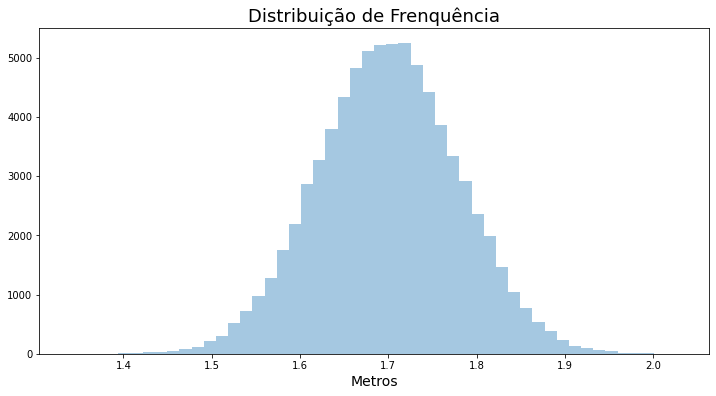

In [36]:
ax = sns.distplot(dados.Altura, kde=False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frenquência', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


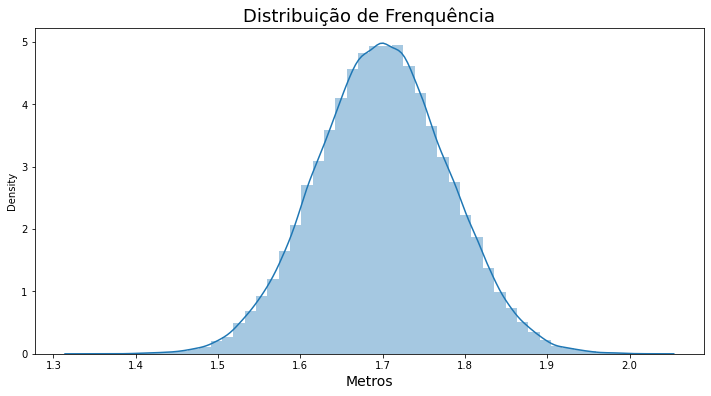

In [37]:
ax = sns.distplot(dados.Altura, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frenquência', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

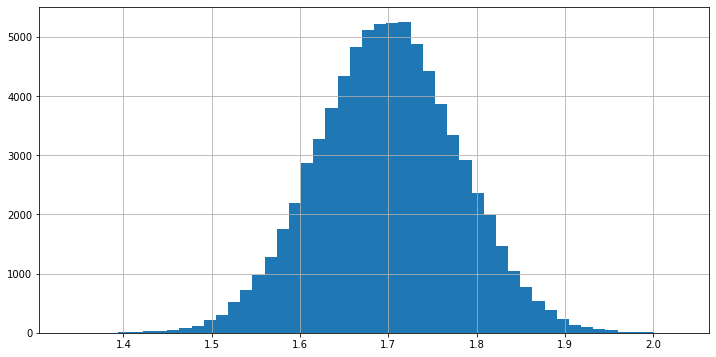

In [38]:
dados.Altura.hist(bins=50, figsize=(12,6))

In [39]:
dis_freq_quati

,Frequência,Porcentagem (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


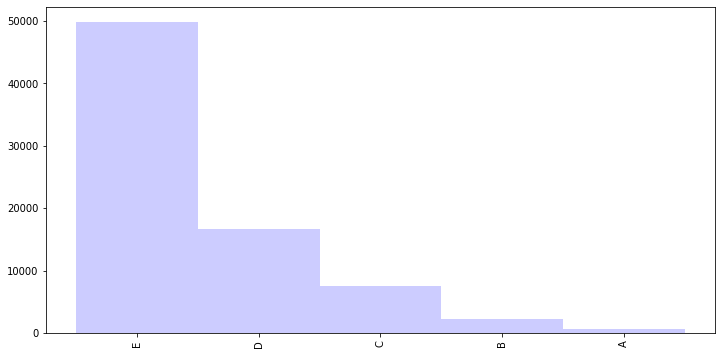

In [40]:
dis_freq_quati['Frequência'].plot.bar(width=1, color='blue', alpha = 0.2, figsize=(12,6))

##Média aritmética

In [41]:
df = pd.DataFrame(
    data = {
        'Fulano': [8, 10, 4, 8, 6, 10, 8],
        'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
        'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]
    },
    index = [
            'Matemática',
            'Português',
            'Inglês',
            'Geografia',
            'História',
            'Física',
            'Química'
    ]
)
df.rename_axis('Matérias', axis=1, inplace=True)

In [42]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [43]:
(8+ 10+ 4+ 8+ 6+ 10+ 8)/7

7.714285714285714

In [44]:
df['Fulano'].mean()

7.714285714285714

In [45]:
dados['Renda'].mean()

2000.3831988547631

In [46]:
dados.groupby(['Sexo']).mean()

,UF,Idade,Cor,Anos de Estudo,Renda,Altura
Sexo,,,,,,
0,31.901991,44.046554,5.038685,9.120169,2192.441596,1.699443
1,31.937728,44.127554,5.018906,10.258584,1566.847393,1.699670


In [47]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

In [48]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [49]:
dataset.Idade.mean()

46.1

In [50]:
dataset.groupby(['Sexo']).mean()

,Idade
Sexo,
H,45.750000
M,46.333333


##Mediana

In [51]:
notas_fulano = df.Fulano
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [52]:
notas_fulano = notas_fulano.sort_values()
notas_fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [53]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [54]:
n = notas_fulano.shape[0]
n

7

In [55]:
elemento_md = (n+1)/2
elemento_md

4.0

In [56]:
notas_fulano.loc[elemento_md-1]

index     Geografia
Fulano            8
Name: 3, dtype: object

In [57]:
df.Fulano.median()

8.0

In [58]:
notas_beltrano = df.Beltrano.sample(6, random_state=101)
notas_beltrano

Matemática    10.0
Inglês         0.5
Física         9.5
História       3.0
Química       10.0
Português      2.0
Name: Beltrano, dtype: float64

In [59]:
notas_beltrano.median() 

6.25

In [60]:
dados.Renda.median()

1200.0

In [61]:
dados.Renda.quantile()

1200.0

##Moda

In [62]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [63]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [64]:
exemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 7])

In [65]:
exemplo.mode()

0    2
1    4
dtype: int64

In [66]:
dados.Renda.mode()

0    788
dtype: int64

In [67]:
dados.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [68]:
dados.Cor.mode()

0    8
dtype: int64

##Moda, Mediana, Média

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


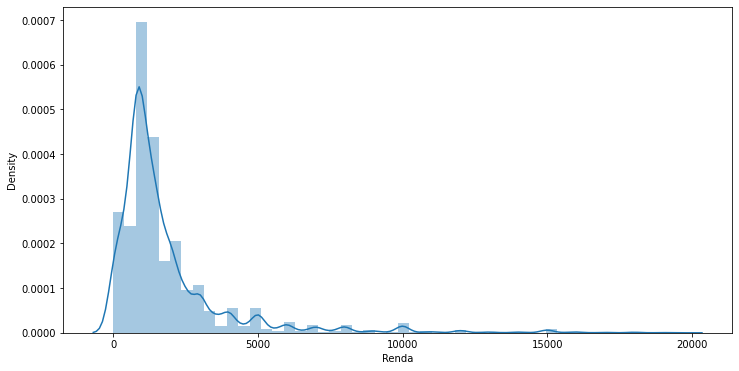

In [69]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

In [70]:
moda = dados.Renda.mode()[0]
moda

788

In [71]:
mediana = dados.Renda.median()
mediana

1200.0

In [72]:
media = dados.Renda.mean()
media

2000.3831988547631

In [73]:
moda < mediana < media

True

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


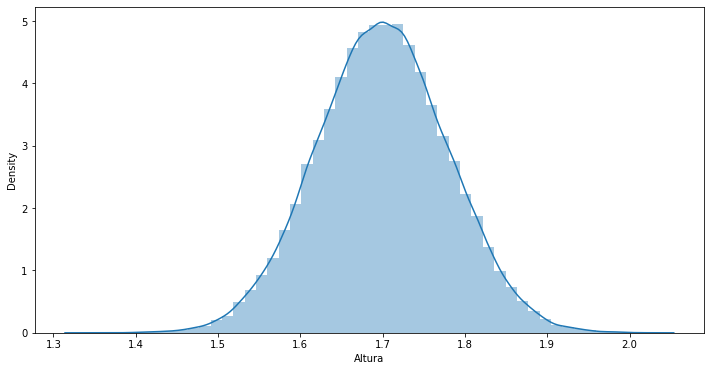

In [74]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax

In [75]:
moda = dados.Altura.mode()
moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [76]:
mediana = dados.Altura.median()
mediana

1.6993247325

In [77]:
media = dados.Altura.mean()
media

1.6995124540575814

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


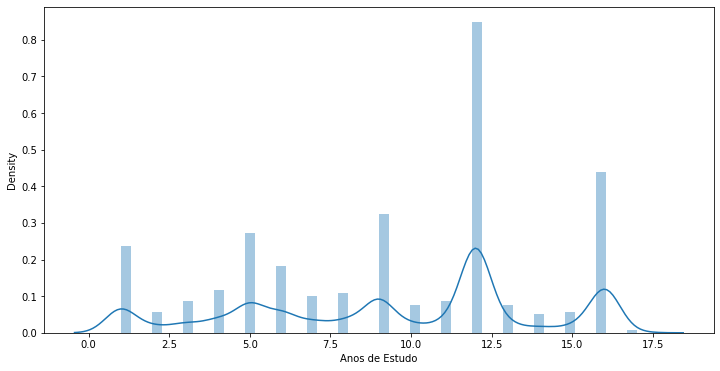

In [78]:
ax = sns.distplot(dados['Anos de Estudo'])
ax.figure.set_size_inches(12, 6)
ax

In [79]:
moda = dados['Anos de Estudo'].mode()
moda

0    12
dtype: int64

In [80]:
mediana = dados['Anos de Estudo'].median()
mediana

11.0

In [81]:
media = dados['Anos de Estudo'].mean()
media

9.469664237376367

#Quartis, decis e percentis

In [82]:
#quantil
dados.Renda.quantile([0.25, 0.50, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [83]:
[i/10 for i in range(1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [84]:
#decil
dados.Renda.quantile([i/10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [85]:
 #percentil
 dados.Renda.quantile([i/100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Anos')

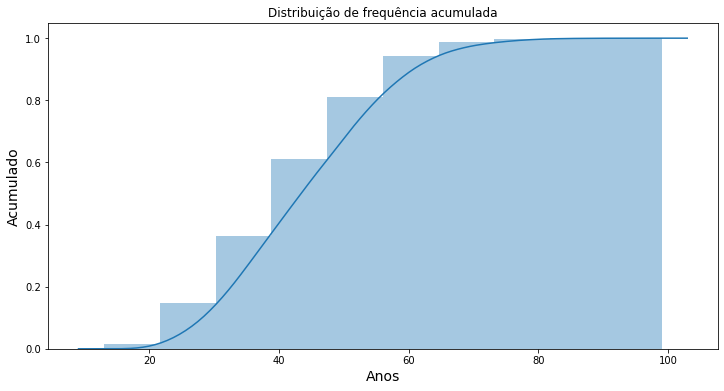

In [86]:
ax = sns.distplot(dados.Idade, hist_kws={'cumulative': True}, kde_kws={'cumulative': True}, bins=10)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência acumulada')
ax.set_ylabel('Acumulado', fontsize = 14)
ax.set_xlabel('Anos', fontsize=14)

In [87]:
#decil
dados.Idade.quantile([i/10 for i in range(1, 10)])

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

#Boxplot

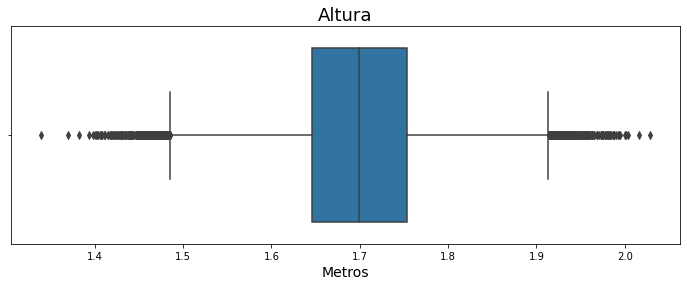

In [88]:
ax = sns.boxplot(data = dados, x = 'Altura', orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

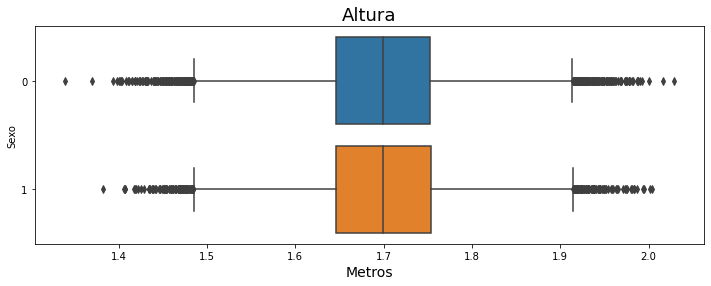

In [89]:
ax = sns.boxplot(data = dados, x = 'Altura', y='Sexo', orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

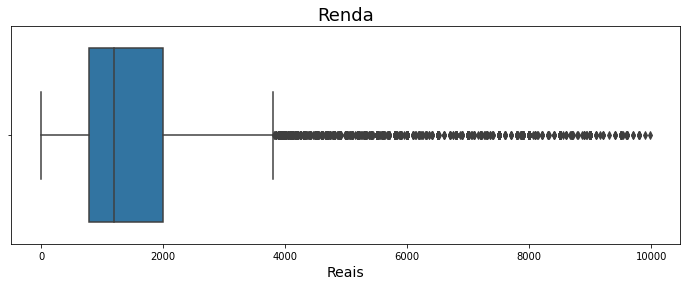

In [90]:
ax = sns.boxplot(data = dados.query('Renda < 10000'), x = 'Renda', orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('Reais', fontsize=14)
ax

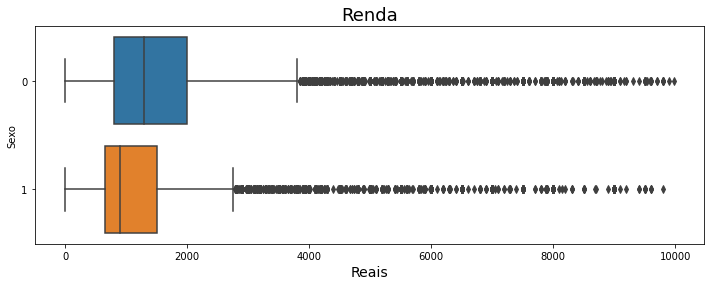

In [91]:
ax = sns.boxplot(data = dados.query('Renda < 10000'), x = 'Renda', y='Sexo', orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('Reais', fontsize=14)
ax

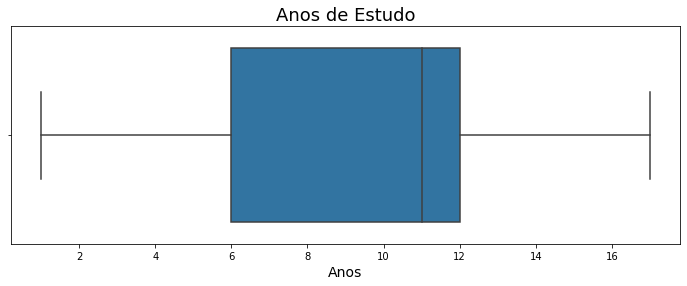

In [92]:
ax = sns.boxplot(data = dados, x = 'Anos de Estudo', orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

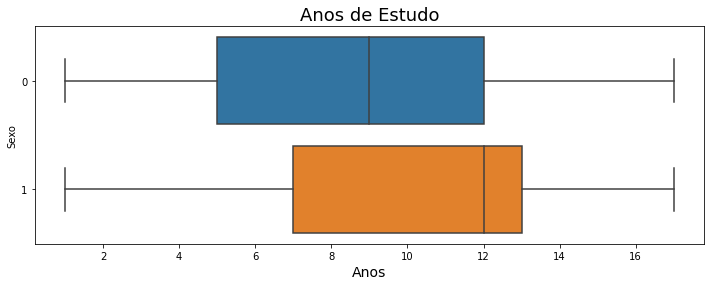

In [93]:
ax = sns.boxplot(data = dados, x = 'Anos de Estudo', y='Sexo', orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

#Medidas de dispersão

In [94]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [95]:
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [96]:
notas_media_fulano = notas_fulano.mean()[0]
notas_media_fulano

7.714285714285714

In [97]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - notas_media_fulano
notas_fulano

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [98]:
notas_fulano['Desvio'].sum()

-8.881784197001252e-16

In [99]:
notas_fulano['|Desvio|'] = (notas_fulano['Fulano'] - notas_media_fulano).abs()
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


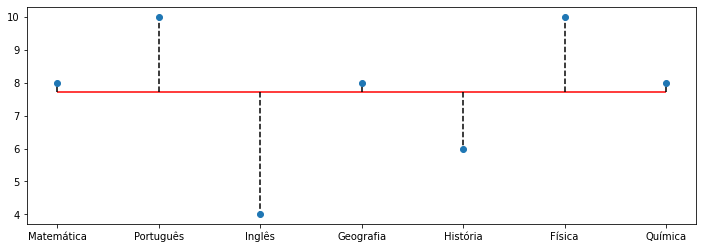

In [100]:
ax = notas_fulano['Fulano'].plot(style = 'o')
ax.figure.set_size_inches(12,4)
ax.hlines(y = notas_media_fulano, xmin = 0, xmax=notas_fulano.shape[0]-1, colors='red')
for i in range(notas_fulano.shape[0]):
    ax.vlines(x=i, ymin = notas_media_fulano, ymax=notas_fulano['Fulano'][i], linestyles='dashed')
ax

In [101]:
notas_fulano['|Desvio|'].mean()

1.5510204081632648

In [102]:
desvio_medio_absoluto = notas_fulano['Fulano'].mad()
desvio_medio_absoluto

1.5510204081632648

In [103]:
df['Sicrano'].mad()

0.4693877551020408

In [104]:
df['Fulano'].mad()

1.5510204081632648